<a href="https://colab.research.google.com/github/danjohnvelasco/AI-Playground/blob/master/Gradient_Descent_Weight_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent with Weight Decay

In this notebook, I'll tweak GD by adding regularization to it.

Weight decay is a regularization technique.

Regularization is a way to reduce overfitting by dampening curvy bits which approaches linear form. (I'll refine this explanation later)

In simple terms, just add a regularization term to the loss function.

When loss function is slightly bigger, gradient descent will make the weights **slightly smaller** than regular SGD/GD.

Resources:
- [Andrew Ng's Deep Learning Lecture on Weight decay](https://www.youtube.com/watch?v=6g0t3Phly2M)
- [fastai course v3 (lesson 5)](https://youtu.be/CJKnDu2dxOE?list=PL9j5O7oQV1533cVfgNUQIJ483A0nrXdm3)
- [D2l.ai](https://d2l.ai/chapter_multilayer-perceptrons/weight-decay.html)


# Intuition

Weight decay / regularization is adding that regularization term (value) to the loss function.

Increasing the value of the loss function will increase the value of gradients w.r.t. weights.

Increasing the gradients means increasing the decrease/change of weights.

Which results in a slightly smaller weights compared to SGD w/o weight decay.

It introduces a new hyperparameter called wd (regularization parameter lambda in some literature).

The bigger the wd, the faster the weights will approach to zero (decays faster).

The smaller the wd, the weights will decay slower.

The bigger the weights, the higher the "penalty" because it drives the overall value of regularization term (sum of squares of weights) which is used in updating the weights.

# Setup

Problem: linear regression

To exaggerate the overfitting scenario:
- sample size = 100
- training set = 10
- test set = 90

In [1]:
# Import dependencies
from fastai.basics import *

In [65]:
# number of points
n=100

In [66]:
x = torch.ones(n,2) # type: torch.Tensor
x[:,0].uniform_(-1.,1) # apply uniform_ on 1st column
x[:5]

tensor([[ 0.5132,  1.0000],
        [ 0.7344,  1.0000],
        [-0.0658,  1.0000],
        [ 0.1003,  1.0000],
        [-0.5464,  1.0000]])

In [67]:
# Correct answer
a = tensor(3.,2)
a

tensor([3., 2.])

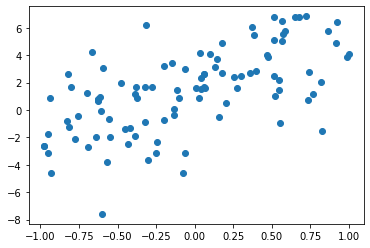

In [68]:
# Dependent variable
# Add noise
y = x@a + 2.5*torch.randn(n) # random numbers
plt.scatter(x[:,0], y);

In [81]:
# train-test split
# train = 20, test = 480
x_train = x[90:]
y_train = y[90:]
x_test = x[:90]
y_test = y[:90]


x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([10, 2]), torch.Size([10]), torch.Size([90, 2]), torch.Size([90]))

In [82]:
# loss function
def mse(y_hat, y): return ((y_hat-y)**2).mean()

# Model

In [119]:
def update_wd(x, y, iters, lr=1e-1, wd=0):
    '''updates vector a'''
    # tracks losses history
    losses = [] 
    test_losses = []
    
    for i in range(iters):
        y_hat = x@a # Make predictions on training set
        y_bar = x_test@a # Make predictions on test set
        
        # sum of squared weights
        # this is just 2 parameters for our setup
        w2 = 0
        for p in a: 
            w2 += (p**2).sum()

        # y_hat -> predictions, y -> actual value
        loss = mse(y_hat, y) + wd*w2 # add regularization term to loss function

        loss.backward() # computes gradient of current tensor wrt to graph leaves (need to dig into this)

        test_loss = mse(y_bar, y_test) # compute loss for test function

        with torch.no_grad():
            a.sub_(lr * a.grad) # subtracts learning rate * gradient to the parameters (inplace)
            a.grad.zero_() # reset grad to zero because torch accumulates grad.. you don't want to reuse it
        

        # Code not related to gradient descent below:
        if i % 10 == 0: 
            print(loss)
            print(f"Iter:{i}\n{a}")

        # track losses for plotting
        losses.append(loss) 
        test_losses.append(test_loss) 
        
    # Plot    
    plt.figure(figsize=(12,8))
    plt.plot(list(range(0,len(losses))), losses, label="train")
    plt.plot(list(range(0,len(test_losses))), test_losses, label="test")
    plt.xlabel("iters")
    plt.ylabel("loss")
    plt.legend(loc="upper right")


# Compare runs of SGD w/ and w/o regularization.

Notice that the weights "a" in SGD w/ regularization are slightly lower than the ones w/o regularization.

When train loss is way lower than test loss, it is overfitting.

As you can see in the plot, the distance between the train-test loss is smaller when regularization is applied compared to w/o regularization.

It means that regularization minimizes overfitting to the training set.

tensor(15790.2051, grad_fn=<AddBackward0>)
Iter:0
Parameter containing:
tensor([-237.7524,   16.1916], requires_grad=True)
tensor(5711.6660, grad_fn=<AddBackward0>)
Iter:10
Parameter containing:
tensor([-143.6116,    3.5443], requires_grad=True)
tensor(2108.3733, grad_fn=<AddBackward0>)
Iter:20
Parameter containing:
tensor([-86.4012,   2.2443], requires_grad=True)
tensor(779.9037, grad_fn=<AddBackward0>)
Iter:30
Parameter containing:
tensor([-51.6504,   1.9866], requires_grad=True)
tensor(289.8323, grad_fn=<AddBackward0>)
Iter:40
Parameter containing:
tensor([-30.5435,   1.8745], requires_grad=True)


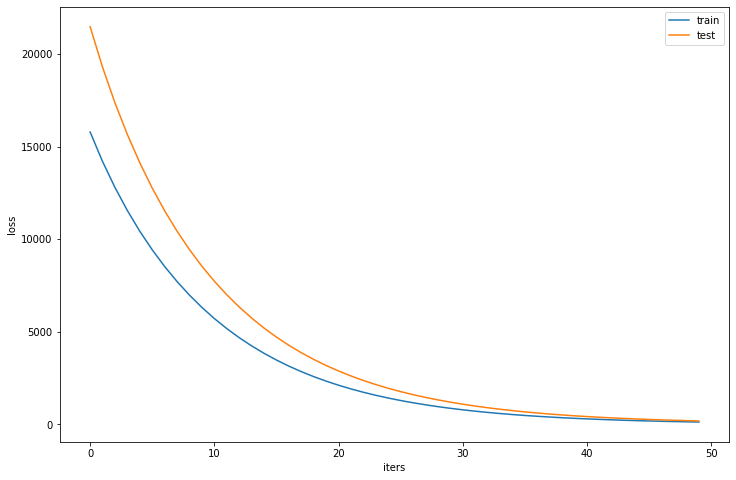

In [125]:
# Test w/ weight decay
a = nn.Parameter(tensor(-250.,20.)); # initialize parameters
update_wd(x_train, y_train, 50, wd=0.1)

tensor(9500.2051, grad_fn=<AddBackward0>)
Iter:0
Parameter containing:
tensor([-242.7524,   16.5916], requires_grad=True)
tensor(5158.4346, grad_fn=<AddBackward0>)
Iter:10
Parameter containing:
tensor([-180.6818,    4.2419], requires_grad=True)
tensor(2884.1543, grad_fn=<AddBackward0>)
Iter:20
Parameter containing:
tensor([-134.2244,    2.7178], requires_grad=True)
tensor(1613.9996, grad_fn=<AddBackward0>)
Iter:30
Parameter containing:
tensor([-99.4775,   2.4060], requires_grad=True)
tensor(903.6649, grad_fn=<AddBackward0>)
Iter:40
Parameter containing:
tensor([-73.4920,   2.2617], requires_grad=True)


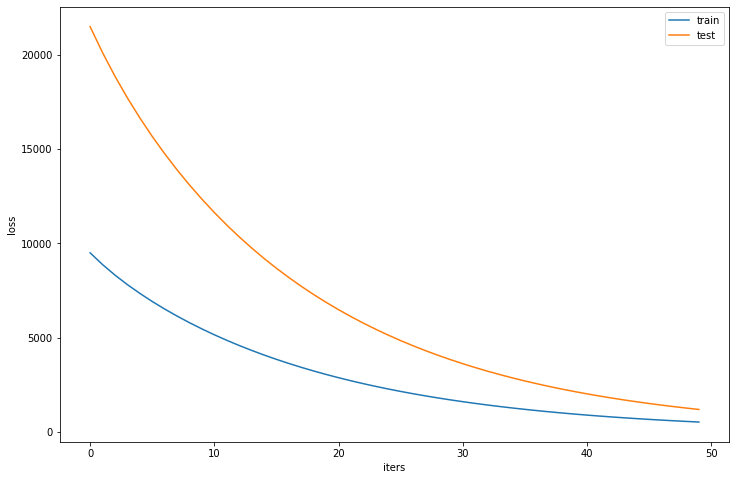

In [121]:
# Test w/o weight decay
a = nn.Parameter(tensor(-250.,20.)); # initialize parameters
update_wd(x_train, y_train, 50, wd=0)